Getting share price from yahoo finance

In [17]:
import pandas as pd
import datetime
import requests
import io
import time


In [24]:
#get prices for a specifc share from yahoo finance
#
def get_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history"
    response = requests.post(url)

    with open('file.csv', 'w') as f:
        f.writelines(response.text)

    df = pd.read_csv('file.csv', index_col='Date', parse_dates=['Date'])

    return df

In [25]:
#example - getting apple share prices
apple=get_price("AAPL")
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.022919,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021723,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020129,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020627,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021225,18362400.0


In [14]:
#real time world index prices
url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]
world_index

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,2826.06,3.82,+0.14%,1.601B,NaN,NaN,NaN
1,^DJI,Dow 30,25585.69,95.19,+0.37%,201.37M,NaN,NaN,NaN
2,^IXIC,Nasdaq,7637.01,8.73,+0.11%,1.534B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),12581.36,56.36,+0.45%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2489.97,5.01,+0.20%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,12336.65,77.95,+0.64%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1514.11,12.73,+0.85%,0,NaN,NaN,NaN
7,^VIX,Vix,15.85,-1.07,-6.32%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,7277.73,46.69,+0.65%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,12011.04,58.64,+0.49%,0,NaN,NaN,NaN


Load historical world index data

In [27]:
def load_index():
    print("Loading index........")
    historical_world_index = {}
    for symbol, name in zip(world_index['Symbol'], world_index['Name']):
    
        print(name)
    
        historical_world_index[name] = get_price(symbol)
        time.sleep(5) #we don't want to get blocked ya
        
    print(".......Complete loading")

load_index()

Loading index........
S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index
.......Completed loading


Text(0.5, 1.0, 'Historical World Indices')

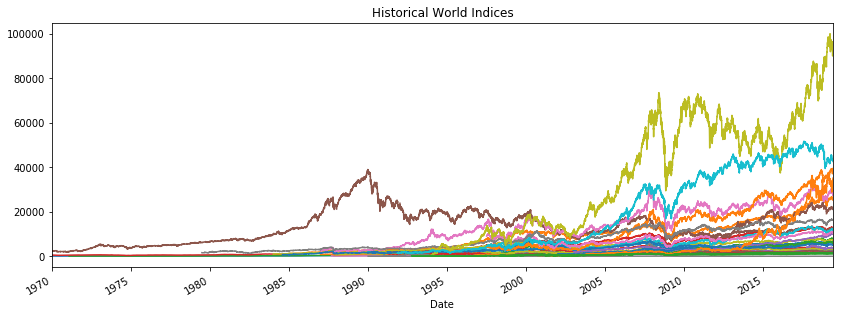

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(14, 5))

for name, history in historical_world_index.items():
    history.Close.plot()
 
plt.title("Historical World Indices")